<a href="https://colab.research.google.com/github/lizzyzacharias/Gold-Standard-Pipeline-Guide/blob/main/Week6_Bile_Duct_Cancer_Underweight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To solve the question: "What are the genetic factors related to Bile Duct Cancer when considering the influence of underweight?"

### 1. Data Preprocessing

In [1]:
# This cell is only for use on Google Colab. Skip it if you run your code in other environments

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA/TCGA_Bile_Duct_Cancer_(CHOL)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.CHOL.sampleMap_CHOL_clinicalMatrix  TCGA.CHOL.sampleMap_HiSeqV2_PANCAN.gz


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.CHOL.sampleMap_CHOL_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.CHOL.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,...,_GENOMIC_ID_TCGA_CHOL_miRNA_HiSeq,_GENOMIC_ID_TCGA_CHOL_gistic2thd,_GENOMIC_ID_TCGA_CHOL_gistic2,_GENOMIC_ID_TCGA_CHOL_PDMRNAseqCNV,_GENOMIC_ID_TCGA_CHOL_exp_HiSeqV2_exon,_GENOMIC_ID_data/public/TCGA/CHOL/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_CHOL_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_CHOL_PDMRNAseq,_GENOMIC_ID_TCGA_CHOL_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_CHOL_RPPA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.7,...,TCGA-3X-AAV9-01,TCGA-3X-AAV9-01A-72D-A416-01,TCGA-3X-AAV9-01A-72D-A416-01,TCGA-3X-AAV9-01,59012a78-0e8f-4b99-af97-0dbb1d3d0513,TCGA-3X-AAV9-01,TCGA-3X-AAV9-01A-72D-A417-09,TCGA-3X-AAV9-01,59012a78-0e8f-4b99-af97-0dbb1d3d0513,AEB48F2C-59ED-45B1-BC10-1875590E7C47
TCGA-3X-AAVA-01,TCGA-3X-AAVA-01,TCGA-3X-AAVA,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,50,NaN,NaN,...,TCGA-3X-AAVA-01,TCGA-3X-AAVA-01A-11D-A416-01,TCGA-3X-AAVA-01A-11D-A416-01,TCGA-3X-AAVA-01,6a8ffc5d-444e-4864-bafd-ddf1ef900ef0,TCGA-3X-AAVA-01,TCGA-3X-AAVA-01A-11D-A417-09,TCGA-3X-AAVA-01,6a8ffc5d-444e-4864-bafd-ddf1ef900ef0,51164357-1D61-4499-82ED-169A9DA8A4C0
TCGA-3X-AAVB-01,TCGA-3X-AAVB-01,TCGA-3X-AAVB,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,70,3.3,4.3,...,TCGA-3X-AAVB-01,TCGA-3X-AAVB-01A-31D-A416-01,TCGA-3X-AAVB-01A-31D-A416-01,TCGA-3X-AAVB-01,88336d42-a31c-448f-a077-2608786c80fe,TCGA-3X-AAVB-01,TCGA-3X-AAVB-01A-31D-A417-09,TCGA-3X-AAVB-01,88336d42-a31c-448f-a077-2608786c80fe,NaN
TCGA-3X-AAVC-01,TCGA-3X-AAVC-01,TCGA-3X-AAVC,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.4,...,TCGA-3X-AAVC-01,TCGA-3X-AAVC-01A-21D-A416-01,TCGA-3X-AAVC-01A-21D-A416-01,TCGA-3X-AAVC-01,8c8d5e98-023b-4496-a237-2632c609f627,TCGA-3X-AAVC-01,TCGA-3X-AAVC-01A-21D-A417-09,TCGA-3X-AAVC-01,8c8d5e98-023b-4496-a237-2632c609f627,D423C8E5-02C2-445A-BA13-C74C0012E2B4
TCGA-3X-AAVE-01,TCGA-3X-AAVE-01,TCGA-3X-AAVE,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,60,3.3,4.0,...,TCGA-3X-AAVE-01,TCGA-3X-AAVE-01A-11D-A416-01,TCGA-3X-AAVE-01A-11D-A416-01,TCGA-3X-AAVE-01,c49a7f2a-f7ef-419d-829a-0b3a9f915aad,TCGA-3X-AAVE-01,TCGA-3X-AAVE-01A-11D-A417-09,TCGA-3X-AAVE-01,c49a7f2a-f7ef-419d-829a-0b3a9f915aad,NaN


In [5]:
# Display gene dataset
gene_data.head()

,TCGA-4G-AAZT-01,TCGA-W5-AA2R-11,TCGA-W5-AA36-01,TCGA-W5-AA2U-01,TCGA-ZU-A8S4-11,TCGA-W5-AA30-11,TCGA-W5-AA2T-01,TCGA-W5-AA2I-01,TCGA-W5-AA2H-01,TCGA-3X-AAVA-01,...,TCGA-ZH-A8Y2-01,TCGA-W5-AA33-01,TCGA-4G-AAZO-01,TCGA-3X-AAVE-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Z-01,TCGA-ZD-A8I3-01,TCGA-3X-AAVC-01,TCGA-W5-AA31-01,TCGA-W5-AA39-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.318608,1.392808,0.823908,0.631008,1.526508,2.113908,0.348508,0.091908,-1.671692,0.856308,...,0.518108,0.068608,0.168608,0.401008,1.511808,0.491008,0.500708,0.241908,0.466608,1.944908
HIF3A,0.005374,-0.873826,-4.106826,-1.027726,0.085474,0.475574,1.838174,0.228874,2.306874,-1.619826,...,0.712174,-1.233926,-2.577826,-1.262126,-3.907726,1.168774,1.910674,2.165274,3.640074,2.114574
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,0.503465,-0.531035,-0.531035,-0.531035,0.515765,1.159265,-0.531035,-0.531035,-0.076535,-0.531035
RNF10,-0.091772,0.138528,0.405528,-0.939772,-0.211972,-0.166372,-0.211972,0.141628,0.118428,0.298528,...,-0.549572,-0.393072,0.315128,0.221328,-0.201172,0.294028,-0.256072,-0.142172,0.366928,0.483328
RNF11,-0.363778,0.150622,-1.582778,-0.331178,0.343522,-0.062778,-0.314878,-0.897878,-1.524178,-0.868478,...,0.364422,-0.412278,-0.054378,0.254422,-1.168478,0.172922,-0.920378,-0.408378,0.252222,-0.084278


In [6]:
# Set Basic info

#gene_fullname = 'BRCA gene'
#gene = 'brca'
trait = 'Bile Duct Cancer'
condition = 'underweight'
condition_col = 'initial_weight'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 110 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.7,...,-0.748878,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988
TCGA-3X-AAVA-01,TCGA-3X-AAVA-01,TCGA-3X-AAVA,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,50,NaN,NaN,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788
TCGA-3X-AAVB-01,TCGA-3X-AAVB-01,TCGA-3X-AAVB,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,70,3.3,4.3,...,-0.748878,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388
TCGA-3X-AAVC-01,TCGA-3X-AAVC-01,TCGA-3X-AAVC,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.4,...,-0.748878,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888
TCGA-3X-AAVE-01,TCGA-3X-AAVE-01,TCGA-3X-AAVE,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,60,3.3,4.0,...,-0.748878,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188


In [8]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,740.0,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,-0.748878,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988
TCGA-3X-AAVA-01,480.0,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788
TCGA-3X-AAVB-01,420.0,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,-0.748878,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388
TCGA-3X-AAVC-01,230.0,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-0.748878,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888
TCGA-3X-AAVE-01,0.0,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,-0.748878,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bile Duct Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,740.0,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988,1
TCGA-3X-AAVA-01,480.0,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788,1
TCGA-3X-AAVB-01,420.0,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388,1
TCGA-3X-AAVC-01,230.0,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888,1
TCGA-3X-AAVE-01,0.0,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188,1


### 2. Preliminary analysis

Plot the distributions of the target and important regressors

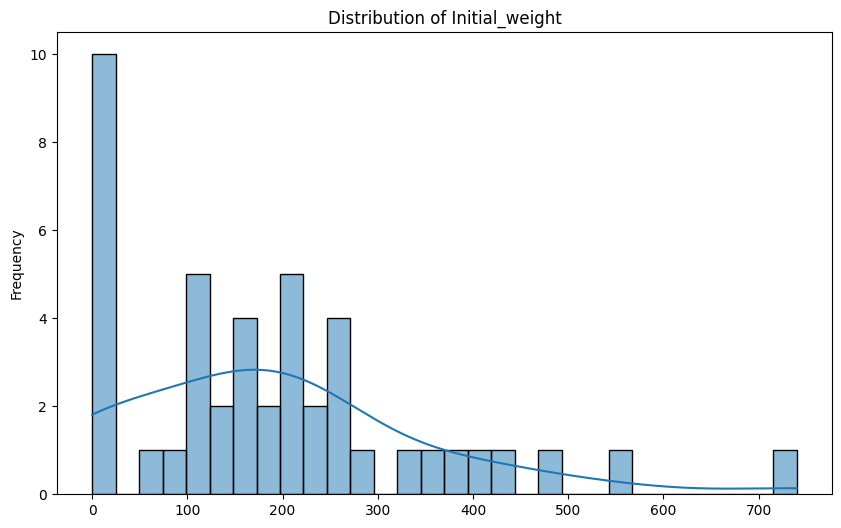

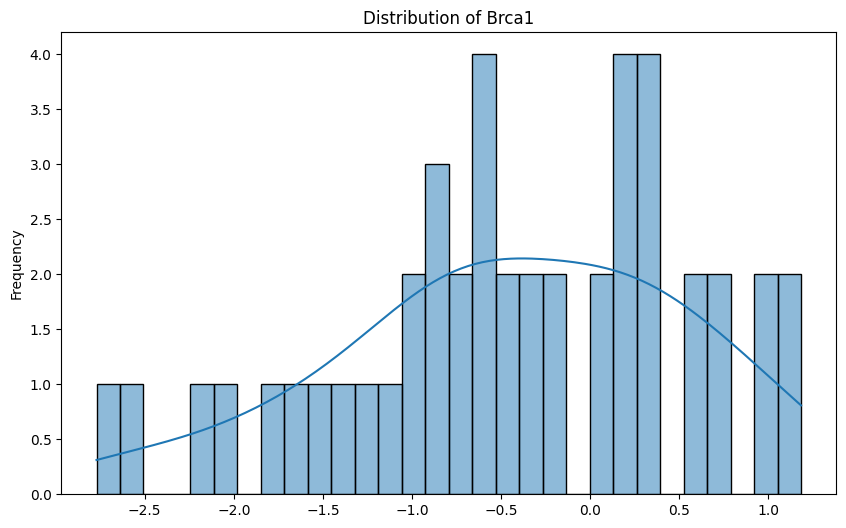

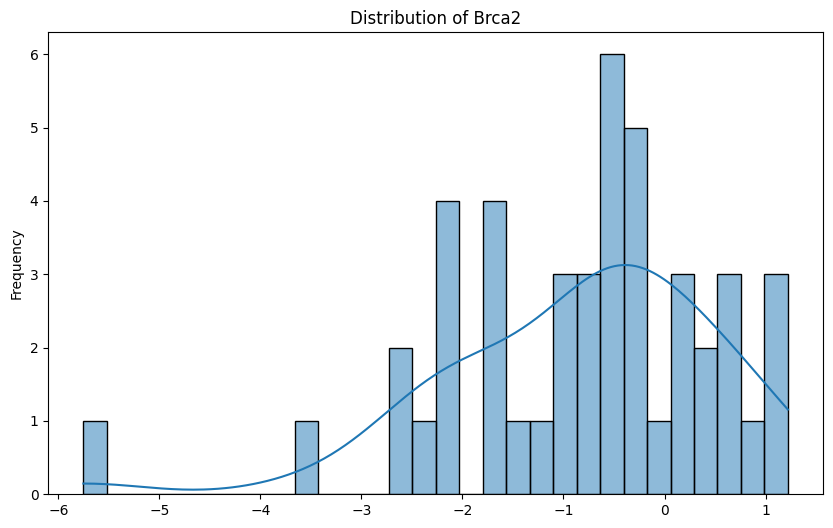

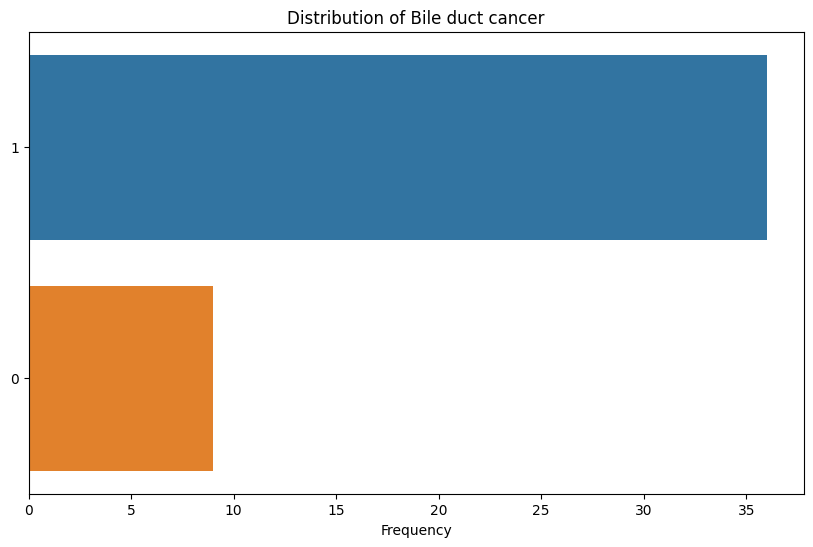

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

Then, draw scatter plots to visualize the relationship between pairs of variables (Optional)

In [11]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bile Duct Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,-2,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988,1
TCGA-3X-AAVA-01,-1,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788,1
TCGA-3X-AAVB-01,-1,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388,1
TCGA-3X-AAVC-01,0,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888,1
TCGA-3X-AAVE-01,0,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188,1


### 3. Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 53.58% ± 4.59%


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


### 4. Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: underweight
Coefficient: -0.0003
p-value: 0.9912



In [18]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
#significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Bile Duct Cancer conditional on the factor underweight, sorted by corrected p-value:
    Variable  Coefficient  corrected_p_value
       IFNA7    -0.400000       2.750026e-27
        GSX1     0.400000       2.750026e-27
   C14orf177     0.400000       2.750026e-27
     DEFB110    -0.400000       2.750026e-27
    ?|136542     0.400000       2.750026e-27
     SNORA35    -0.400000       2.750026e-27
     SNORA37     0.400000       2.750026e-27
   DEFB109P1     0.400000       2.750026e-27
      OR4C15     0.400000       2.750026e-27
    SNORD11B     0.400000       2.750026e-27
        NXF2    -0.400000       2.750026e-27
       CRYGB    -0.400000       2.750026e-27
       MS4A5    -0.400000       2.750026e-27
      GAGE2A    -0.400000       2.750026e-27
    FLJ44082     0.400000       2.750026e-27
     SLC22A6     0.400000       2.750026e-27
      SNAR-H     0.400000       2.750026e-27
      SNAR-E    -0.400000       2.750026e-27
   